In [127]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Question 1 Numerical Solution to ODEs

A)

In [128]:
t0 = 0
tN = 100
t = np.linspace(t0, tN, 1000)  

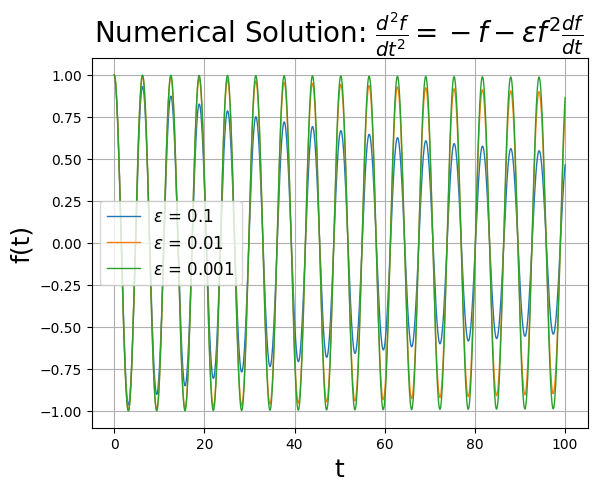

In [137]:
for epsilon in [0.1, 0.01, 0.001]:
  def system(t, u):
      u1, u2 = u
      du1_dt = u2
      du2_dt = -u1 - epsilon*(u1**2)*(u2)
      return [du1_dt, du2_dt]

  # Initial conditions
  u1_0 = 1  # u(0) = 1
  u2_0 = 0  # du/dt(0) = 0
  y0 = [u1_0, u2_0]
  # solve
  sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
  ts_numerical = sol.t
  us_numerical = sol.y[0]

  plt.plot(ts_numerical, us_numerical, linewidth = 1, label = rf"$\epsilon$ = {epsilon}")
  plt.xlabel("t", fontsize = 18)
  plt.ylabel(rf"f(t)", fontsize = 18)
  plt.title(r"Numerical Solution: $\frac{d^2f}{dt^2} = -f - \epsilon f^2 \frac{df}{dt}$", fontsize = 20)
  plt.grid()
  plt.legend(loc = "best", fontsize = 12)
plt.show()

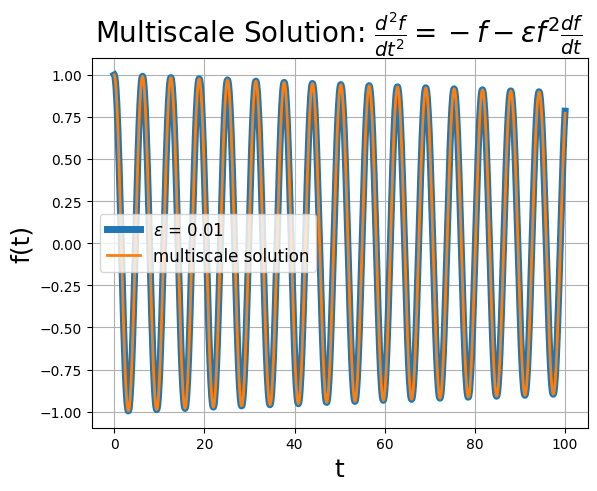

In [139]:
# multiscale solution
plt.clf()
epsilon = 0.01
def multiscale_soln(t):
  u = 2*np.cos(t)/np.sqrt((4)+epsilon*t)
  return u 
u1_0 = 1  # u(0) = 1
u2_0 = 0  # du/dt(0) = 0
y0 = [u1_0, u2_0]
# solve
sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
ts_numerical = sol.t
us_numerical = sol.y[0]

tf = t
ts = epsilon * t
multiscale_solution = multiscale_soln(t)
plt.title(r"Multiscale Solution: $\frac{d^2f}{dt^2} = -f - \epsilon f^2 \frac{df}{dt}$", fontsize = 20)
plt.xlabel("t", fontsize = 18)
plt.ylabel(rf"f(t)", fontsize = 18)
plt.grid()
plt.plot(ts_numerical, us_numerical, linewidth = 5, label = rf"$\epsilon$ = {epsilon}")
plt.plot(t, multiscale_solution, label = "multiscale solution", linewidth = 2)
plt.legend(loc = "best", fontsize = 12)